In [1]:
from osgeo import gdal #to crop tile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# File paths to images
from pathlib import Path

gdal.UseExceptions()

osgeo._gdal


In [10]:
# Split every image into 512x512 px to create 256x256 m images

skysat_path = 'path_to_skysat_images'
output_path = 'output_path'
data_to_process_3 = glob.glob(os.path.join(skysat_path, '*.tif'))
# Dimensions of output images
tile_px = 512
for clip_img in os.list.dir(skysat_path):
    img = gdal.Open(clip_img)
    gt = img.GetGeoTransform()
    
    # Upper left coordinates
    xmin = gt[0]
    ymax = gt[3]
    
    # Resolution and division
    res = gt[1]
    tile_size = res * tile_px
    num_x = int(img.RasterXSize / tile_px)
    num_y = int(img.RasterYSize / tile_px)
    
    xsteps = [xmin + tile_size * i for i in range(num_x+1)]
    ysteps = [ymax - tile_size * i for i in range(num_y+1)]
    
    for i in range(num_x):
        for j in range(num_y):
            xmin = xsteps[i]
            xmax = xsteps[i+1]
            ymax = ysteps[j]
            ymin = ysteps[j+1]
            
            # Create and save the subsetted image
            filename = output_path + clip_img[64:-4] + '_' + str(i).zfill(2) + str(j).zfill(2) + '.tif'
            raster = gdal.Warp(filename, img, outputBounds=(xmin,ymin,xmax,ymax))

/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0000.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0001.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0002.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0003.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0004.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0005.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0006.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0007.tif
/Users/rjlee6/Documents/ethiopia/tigray_groundtruth_skysat/test/20221001_073001_ssc13_u0001_visual_0008.tif
/Users/rjlee6/Documents/ethi

In [47]:
# Delete all images that don't contain full image (from subset skysat collect)
clip_path = 'output_path'
data_to_process = glob.glob(os.path.join(clip_path, '*.tif'))
for clip_img in data_to_process:
    img = gdal.Open(clip_img)
    band = img.GetRasterBand(4)
    img_array = band.ReadAsArray()
    if 0 in img_array:
        os.remove(clip_img)
        print('Deleted ' + clip_img)

(512, 512, 3)


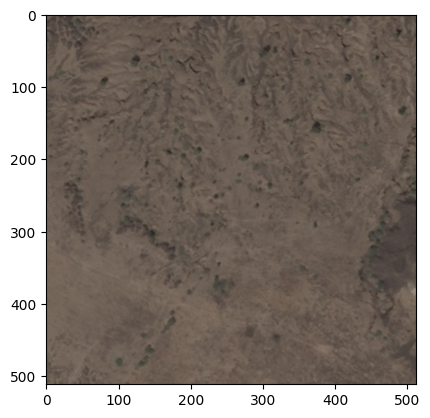

In [67]:
# Plot an image to test
from matplotlib import pyplot as plt
def load_geotiff(file):
    ds = gdal.Open(file)
    band1 = ds.GetRasterBand(1).ReadAsArray() # Red channel
    band2 = ds.GetRasterBand(2).ReadAsArray() # Green channel
    band3 = ds.GetRasterBand(3).ReadAsArray() # Blue channel
    img = np.dstack((band1, band2, band3))
    return img
image = load_geotiff('path_to_image')
print(image.shape)
plt.imshow(image)